# Inhibitory-Stabilised Network (ISN) and Paradoxical Inhibition (50 marks)

Tsodyks et al. (1997) linear model as given in assignment spec:

\begin{equation}
\tau_E \frac{dr_E}{dt} = -r_E + \beta ( W_{EE}r_E - W_{EI}r_I + u_E)
\end{equation}

\begin{equation}
\tau_I \frac{dr_I}{dt} = -r_I + \beta ( W_{IE}r_E - W_{II}r_I + u_I)
\end{equation}

## Comment on the biological relevance of the model given by equations (1,2) - how would you interpret the various terms in the equations?  Describe some of the most obvious ways in which the model could be considered biologically unrealistic. Why might one choose to study a model such as this rather than a more biologically realistic one? (7 marks)

### Interpreting the terms of equations (1,2)


where, 
- $E$ : excitatory
- $I$ : inhibitory
- $\beta$(x) : response function, the proportions of cells firing in the two populations of a given level of input activity $x$
- $x$ in $\beta(x)$ : input activity
- $W$ parameters : strength of the interactions in the model
    + $W_{ee}$ : product of the average number of recurrent excitatory contacts per cell and the average postsynaptic current attributable to one presynapptic action potential on the postsynaptic cell.
- $\tau_x$ : constants that describe time needed to bring neurons to firing as they recieve subthreshold excitation; comparable to the membreane time constants of these neurons (~10-20ms
- $u_x$ : the average external input to the inhibitory population

Setting variables as per the assignment spec,

### Biological Relevance/Isomorphism of ISN 

The biological relevance of the model realtes to xyz cells

### Biological Limitations of ISN

One way that our ISN model is biologically unrealistic is...

### Advantages of ISN over more Biologically Realistic Models

The following Arguments can be made for the advantages of ISN over more biologically realistic models:

- *Homomorphism > Isomorphism*: its only the 'important' functionality that we want to map. Biological realism is not the goal, functional approximation is.
- *occams razor*: we want minimally simple models capable of explaining important phenomenon. Biologically realism will require massive amounts of redundant computation for any specific project short of full biological emulation
- *interpretability*: we want models that are easily interpretable to humans.

*Conclusion*: Biology is massively complex at multiple levels of analysis (many of which will be beyond the scope of a specific investigation) and making progress in human understanding requires *dimensionality reduction*

## Consider Network 1, and set $u_E = 1$, $u_I = 1$. Simulate equations (1,2) for $N_t = 500$ time steps (i.e., 500ms real time). Plot $r_e$ and $r_I$ as a function of time. (5 marks)

In [2]:
# -- Define our Inhibitory-Stabilised Network (ISN) --
Base.@kwdef mutable struct ISN
    net1_flg = true;
    β   = 1 
    τₑ  = 10;  τᵢ  = 10
    uₑ  = 1;   uᵢ  = 1
    Wᵢₑ = 1.8; Wₑᵢ = 1.8; Wᵢᵢ = 1;
    Wₑₑ = net1_flg ? 0.5 : 1.5 
    rₑ::Float64 = 0; rᵢ::Float64 = 0     
end

ISN

In [3]:
# -- Translating equations (1,2) to julia code --
function step!(n::ISN)
    ∂rₑ = (-n.rₑ + n.β*((n.Wₑₑ*n.rₑ) - (n.Wₑᵢ*n.rᵢ) + n.uₑ)) / n.τₑ;  n.rₑ += ∂rₑ
    ∂rᵢ = (-n.rᵢ + n.β*((n.Wᵢₑ*n.rₑ) - (n.Wᵢᵢ*n.rᵢ) + n.uᵢ)) / n.τᵢ;  n.rᵢ += ∂rᵢ
end

step! (generic function with 1 method)

In [30]:
# -- Simulating equations (1,2) for Nₜ= 500 --
using Plots

n  = ISN() # initalise our network
Nₜ = 500   # num iterations

function simulate_net(n::ISN, Nₜ)
    rₑ_arr = zeros(Nₜ)
    rᵢ_arr = zeros(Nₜ)
    
    for i=1:Nₜ
        step!(n)
        rₑ_arr[i] = n.rₑ
        rᵢ_arr[i] = n.rᵢ
    end 
    
    return hcat(rₑ_arr, rᵢ_arr)
end

# simulate_net(n,Nₜ)

simulate_net (generic function with 1 method)

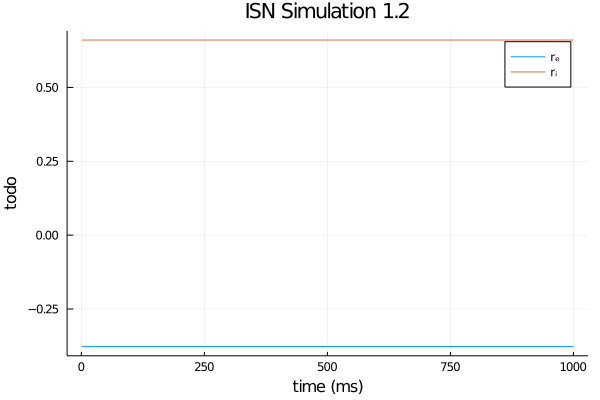

In [39]:
# -- Plotting rₑ and rᵢ as a function of time --

function plot_ISN(x, y, title)
    plot(x, y, 
        title=title,
        xlabel="time (ms)", ylabel="todo",
        label=["rₑ" "rᵢ"],
    )
end


x = 1:Nₜ
y = simulate_net(n,Nₜ)

plot_ISN(x,y, "ISN Simulation 1.2")

annotate!(1,1,"hello")

## Repeat this simulation, this time increasing $u_{I}$ after 500 time steps and simulating for a further 500 time steps at the new value ($N_t = 1000$ in total, with $u_I = 1$ for the first 500 steps and $u_I = 2$ for the second 500 steps). Plot $r_E$ and $r_I$ as a function of time. Comment on what you observe. (5 marks)

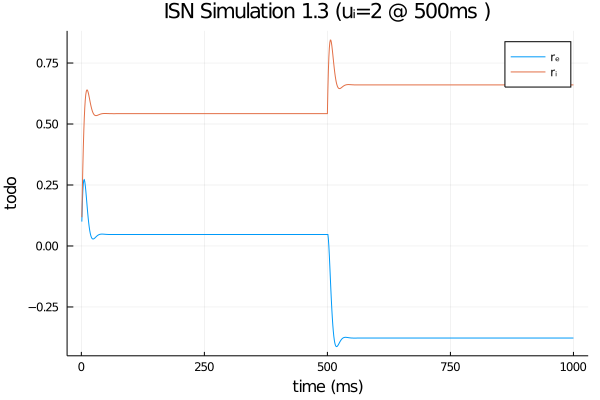

In [32]:
# -- Simulating equations (1,2) for Nₜ=1000, uᵢ= Nₜ<501 ? 1 : 2 --
Nₜ   = 1000        
x    = 1:Nₜ
y₁   = y     # first 500 results
n.uᵢ = 2

y₂ = simulate_net(n,(Nₜ÷2))

y = vcat(y₁, y₂)

plot_ISN(x,y, "ISN Simulation 1.3 (uᵢ=2 @ 500ms )")

## Now perform the simulation of question 1.3 for Network 2 and plot the results as before. How do the results differ form Network 1? why is the change in $r_1$ following increased $u_1$ in Network 2 considered "paradoxical"? (5 marks)

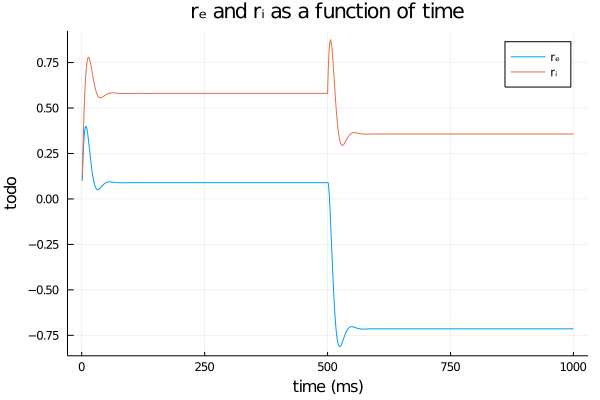

In [12]:
# -- Simulating equations (1,2) for Nₜ=1000, uᵢ= Nₜ<501 ? 1 : 2 (Net 2) --
Nₜ   = 1000        
n    = ISN(net1_flg=false)
y₁   = simulate_net(n,(Nₜ÷2))
n.uᵢ = 2
y₂   = simulate_net(n,(Nₜ÷2))

x = 1:Nₜ
y = vcat(y₁, y₂)

plot_ISN(x,y)

The change in $r_1$ following increased $u_1$ in Network 2 is considered paradoxical because...

## Using the results from the simulations you performed in questions 3 and 4, plot the excitatory, inhibitory and external input to $I$ cells ($W_{IE^rE} - W_{II^rI}$, and $u_I$ respectively) as a function of time for Network 1 and Network 2. Based on these plots, provide an explanation in terms of the various inputs to $I$ cells as to why a paradoxical response of $r_I$ occurs in Network 2 but not Network 1. 

In [8]:
# -- Plotting excitatory, inhibitory and external input to `I` cells --

A paradoxical response of $r_I$ occurs in Network 2 but not Network 1 because the inputs to Network 2...

## For each of the two networks , now set $u_I = 1$ throughout the simulation and instead increase $u_E$ for the second 500 time steps ($u_E = 1$) ($u_E = 1$ for the first 500 and $u_E = 2$ for the 2nd 500 timesteps). Plot $r_E$ and $r_I$ against time. How do $r_E$ and $r_I$ in each network respond to the increase in $u_E$? (5 marks)

In [9]:
# -- Simulating equations (1,2) for Nₜ=1000, uᵢ = 1, uₑ= Nₜ<501 ? 1 : 2 --

# Simulating for Network 1
net1_flg = True

# Simulating for Network 2
net1_flg = False

LoadError: UndefVarError: True not defined

In [10]:
# -- Plotting rₑ and rᵢ against time --



$r_E$ and $r_1$ respond to the increase in $u_E$ by...

## Repeat the simulation of question 1.6 for each network, but this time freeze $r_I$ on the 500th timestep, holding it for the remainder of the simulation but continuing to update $r_R$. Plot $r_E$ and $r_I$ against time for each network. Comment on what happens to $r_E$ in each network after $u_E$ is increased. (5 marks)

In [11]:
# -- Simulating equations (1,2) as in 1.6 with rᵢ constant after t=500 --
# vars: Nₜ=1000, uᵢ = 1, uₑ= Nₜ<501 ? 1 : 2, rᵢt2 = if t>500 then rᵢt1

# Simulating for Network 1
net1_flg = True

# Simulating for Network 2
net1_flg = False

LoadError: UndefVarError: True not defined

In [12]:
# -- Plotting rₑ and rᵢ against time --



After $u_E$ is increased, $r_E$ does x in network 1 and y in network 2 ...

## Based on the simulations in this section, comment on the role of inhibition in dynamically stabilising network responses and the relationship of this to paradoxical inhibition. (4 marks)

The role of inhibition in dynamically stabilising network responses is ...

The relationship to paradoxical inhibition is...

## Tsodyks et al. derived all of the results of this section analytically, without requiring any simulations. What advantages might there be taking an analytical approach as opposed to a simulation-based approach you took here? (4 marks)

Some advantages of an *analytical approach* over a *simulation based approach* could be
- neccecites higher level of understanding of the model
    + this could lead to better generalisability in the human


However I would also stress the advantages of the simulation based approach over an analytic approach (to the extent that they are competing rather than complementary)
- the analytic approach is still 'simulating' the process to get the results in some sense, its just that the simulation is internal to the human. Computational simulations are much more powerful and have many great qualities that human 

## Based on your findings in this section, what would you suggest your experimental colleagues do in order to determine whether networks in the brain are inhibitory-stabilised or not? Can you think of any caveats to the modelling approach of this section that might make it difficult to confidently make experimental predictions?

Well done nathan if you ever make it this far!

# Supralinear Stabilised Network (SSN)

- properse to accoint for various contextual influences on responses of neurons in the visual cortex (Ahmadian et al,. 2013; Rubin et al,. 2015)
- 

# Apendices

## Appendix 1

Equation numbering for the jupyter notebook julia kernel. 

In [13]:
macro javascript_str(s) display("text/javascript", s); end

@javascript_str (macro with 1 method)

In [14]:
# Set up equation numbering
javascript"""
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
"""

In [15]:
# Reloads the equation numbering
javascript"""
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
"""